## Ising model, Monte Carlo simulation - Metropolis algorithm
    

In [176]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex


In [177]:
print("Total energy - Hamiltonian defined as:")
display(Math(r'$H = -J_{ij}\sum_{<ij>}^{}s_{i}s_{j} - h\sum_{i}^{}s_{i}'))
print("Where: ")
display(Math(r'$J_{ij} - \text{Coupling parameter between adjecent atoms}'))
display(Math(r'$h - \text{External Fiels Strength}'))
display(Math(r'$s_{i, j} - \text{spin of particle}'))
             

Total energy - Hamiltonian defined as:


<IPython.core.display.Math object>

Where: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [180]:
# https://arxiv.org/pdf/0803.0217.pdf
class IsingModel(object):
    
    def __init__(self,N):
        self.N = N # grid size
        self.J = 1.0
        self.h = 0.0 # external field strength
        
        self.grid = 2*np.random.randint(2, size=(N,N))-1
        self.E = 0.0
        self.M = 0.0
        self.invBolzConst = 1.0 / (1.38*10**(-23))
        
    def AcceptMove(self, dE, T):
        '''
        Calculate probability for acceptance of flip
        '''
        # exp(-dE/kT)
        return np.exp((-dE * (float(1/T)*self.invBolzConst) ))
    
    def TotalEnergy(self, grid):
        '''
        Hamiltonian calculation
        '''            
        
        energy = 0.0
        N = grid.shape[0]
        for i in range(len(grid)):
            for j in range(len(grid)):
                S = grid[i,j]
                nb = grid[(i+1)%N, j] + grid[i,(j+1)%N] + grid[(i-1)%N, j] + grid[i,(j-1)%N]
                energy += ((-nb*S)/2.0 - self.h*S)
        return energy
        
    def MCStep(self, T):
        '''
        Monte Carlo simulation step
        Choose random spot on lattice
        IF dE <= 0:
            YES:
                Flip spin at choosen spot
                Store Changes in observable
                End
            NO:
                IS random < exp(-dE/kT):
                YES:
                    Flip spin at choosen spot
                    Store Changes in observable
                    End
                NO: 
                    End
        '''
        E = 0
        M = 0
        a = np.random.randint(self.N)
        b = np.random.randint(self.N)
        new_grid = np.copy(self.grid)
        s = self.grid[a,b]
        s *= -1
        new_grid[a, b] = s
        new_energy = self.TotalEnergy(new_grid)
        current_energy = self.TotalEnergy(self.grid)
        dE = new_energy - current_energy
        store = False
        if dE <= 0:
            self.grid[a,b] = s
            store = True
        elif np.random.random() < self.AcceptMove(dE, T):
            self.grid[a,b] = s
            store = True
            
        if store:
            E = self.TotalEnergy(self.grid)
            M = self.Magnetization()
        
        return E, M, self.grid

    def Magnetization(self):
        '''
        Calculate magnetization of configuration
        '''
        
        return np.sum(self.grid)

In [181]:
def paint_grid(model, color):
    fig, ax = plt.subplots()
    ax.set_title("Snapshot of grid configuration")
    # im = ax.imshow(model.grid, cmap='YlGn')
    im = ax.imshow(model.grid, cmap=color)
    cbar = ax.figure.colorbar(im, ax=ax, )
    cbar.ax.set_ylabel(" ", rotation=-90, va="bottom")
    cbar.set_ticks([-1.0 , 1.0])
    cbar.values = [-1.0, 1.0]
    
def plot_results(E, M, temperatures):
    f = plt.figure(figsize=(18, 10)); # plot the calculated values    

    sp =  f.add_subplot(1, 2, 1 );
    plt.scatter(temperatures, E, s=50, marker='o', color='IndianRed')
    plt.xlabel("Temperature (T)", fontsize=20);
    plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

    sp =  f.add_subplot(1, 2, 2 );
    plt.scatter(temperatures, np.absolute(M), s=50, marker='o', color='RoyalBlue')
    plt.xlabel("Temperature (T)", fontsize=20); 
    plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');



In [208]:
temperature_points = 20
N = 5

# Allow the system to equilibriate (typically takes ∼N**3 iterations)
equilibration_steps = 1000   
mc_steps = 10000     #  number of MC sweeps for calculation

temperature_boundary = [1.0, 4.0]
temperatures = np.linspace(temperature_boundary[0], temperature_boundary[1], temperature_points)
n = 1.0/(mc_steps*N*N)
# normalize by number of samples

In [209]:
E = []
M = []
# grids = []
print("Start MC simulation for " + str(len(temperatures)) + " temperatures")
print("Number of equilibration steps: " + str(equilibration_steps) + " and simulation steps: "+str(mc_steps))

for idx, t in enumerate(temperatures):
    en = 0
    mag = 0
    grid = 0
    acc_M = 0
    acc_E = 0
    m = IsingModel(N)
    
    print("temperature:" + str(idx+1) + " of " + str(len(temperatures) ))
    for i in range(equilibration_steps):
        m.MCStep(t)
        
    for i in range(mc_steps):
        en, mag, grid = m.MCStep(t)
        acc_E +=en
        acc_M +=mag
        
    E.append(n*acc_E)
    M.append(n*acc_M)

Start MC simulation for 20 temperatures
Number of equilibration steps: 1000 and simulation steps: 10000
temperature:1 of 20
temperature:2 of 20
temperature:3 of 20
temperature:4 of 20
temperature:5 of 20
temperature:6 of 20
temperature:7 of 20
temperature:8 of 20
temperature:9 of 20
temperature:10 of 20
temperature:11 of 20
temperature:12 of 20
temperature:13 of 20
temperature:14 of 20
temperature:15 of 20
temperature:16 of 20
temperature:17 of 20
temperature:18 of 20
temperature:19 of 20
temperature:20 of 20


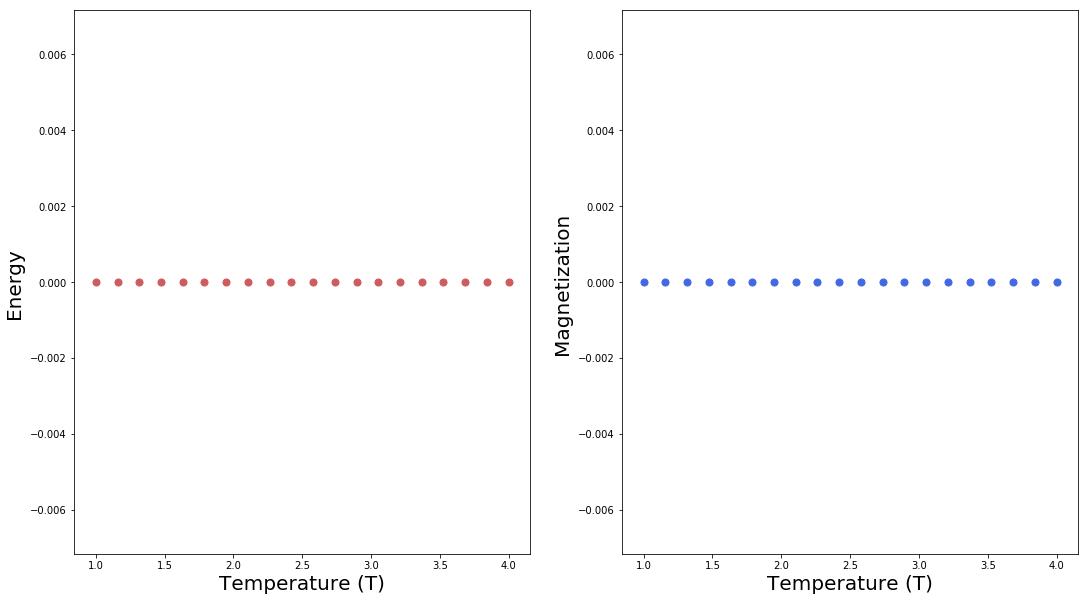

In [210]:
plot_results(E,M,temperatures)